# Particle Swarm Optimization (PSO)


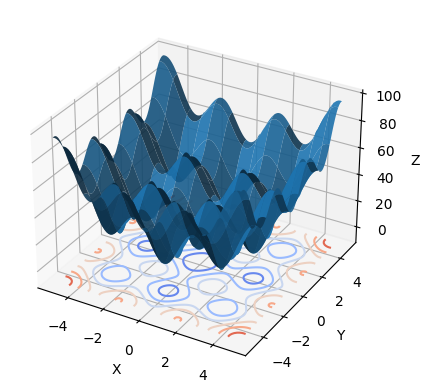

In [17]:
#Funcion Eggcrate
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

plt.close('all')

X    = np.arange(-5,5.1,0.1)
Y    = np.arange(-5,5.1,0.1)
X, Y = np.meshgrid(X, Y)
Z    = X**2 + Y**2 + 25*(np.sin(X)**2 + np.sin(Y)**2) 
fig  = plt.figure()
ax   = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=8, cstride=8,alpha=0.9)
cset = ax.contour(X, Y, Z, zdir='z', offset=-10, cmap=cm.coolwarm)

 

ax.set_xlabel('X')
ax.set_xlim(-5.5, 5.5)
ax.set_ylabel('Y')
ax.set_ylim(-5.5, 5.5)
ax.set_zlabel('Z')
ax.set_zlim(-10, 100)

 

plt.show()

In [18]:
#Funcion a optimizar
def Sphere( x ):
    x = np.array(x)
    return sum(x**2)

 

#Funcion eggcrate
def Eggcrate(x):
    x = np.array(x)
    return x[0]**2 + x[1]**2 + 25*(np.sin(x[0])**2 + np.sin(x[1])**2)

 

# Funcion eggholder
def Eggholder(x):
    x = np.array(x)
    a = np.sqrt(np.abs(x[1]+x[0]/2+47))
    b = np.sqrt(np.abs(x[0]-(x[1]+47)))
    c = -(x[1]+47)*np.sin(a)-x[0]*np.sin(b)
    return ( c )

In [19]:
class Particle:
    def __init__(self, nVar):
        self.position      = []         # Posición inicial
        self.velocity      = []         # Velocidad inicial
        self.best_position = []         # Mejor posición individual
        self.best_cost     = np.inf     # Mejor costo individual
        self.cost          = None       # Costo actual
        self.nVar          = nVar       # Numero de variables (dimensión)
        
        for i in range(0, self.nVar):
            self.velocity.append( np.random.uniform(-10, 10) )
            self.position.append( np.random.uniform(-100, 100) )
        
        # print(self.position)
        # print("=============")
        # print(self.velocity)
        # print("=============")


    # Evaluar la posicion para obtener el costo
    def evaluation(self, CostFunction):
        self.cost = CostFunction( self.position )


        # Actualizar mejor costo individual
        if self.cost < self.best_cost:
            self.best_position = self.position
            self.best_cost     = self.cost
    
    # Actualizar Velocidad
    def new_velocity(self, best_position_glo, w=0.75):
        c1 = 1          # Coeficiente de aceleracion personal
        c2 = 2          # Coeficiente de aceleracion social
        # w  = 0.75       # Coeficiente de incercia


        for i in range(0, self.nVar):
            r1 = np.random.random()
            r2 = np.random.random()


            vel_personal     = c1 * r1 * (self.best_position[i] - self.position[i])
            vel_social       = c2 * r2 * (best_position_glo[i]  - self.position[i])
            self.velocity[i] = w  * self.velocity[i] + vel_personal + vel_social
    
    # Actualizar Posición
    def new_position(self, limit):
        for i in range(0, self.nVar):
            self.position[i] += self.velocity[i]
            
            #Limites inferiores y superiores de posición
            self.position[i] = np.maximum(self.position[i], limit[i][0])
            self.position[i] = np.minimum(self.position[i], limit[i][1])

In [20]:
class PSO():
    def __init__(self, CostFunction, nVar, limit, population, iteration):
        global num_dimensions

        # num_dimensions=len(x0)
        best_cost_glo     = np.inf          # Mejor costo del enjambre
        best_position_glo = []              # Mejor posicion del enjambre

        # Se crea al enjambre
        swarm = []
        for i in range(0, population):
            swarm.append( Particle(nVar) )
        
        # main loop
        i = 0
        w = 1
        while i < iteration:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0, population):
                swarm[j].evaluation( CostFunction )


                # determine if current particle is the best (globally)
                if (swarm[j].cost < best_cost_glo):
                    best_position_glo = list(  swarm[j].position )
                    best_cost_glo     = float( swarm[j].cost )
            
            # cycle through swarm and update velocities and position
            w = w * 0.9
            for j in range(0, population):
                swarm[j].new_velocity( best_position_glo, w )
                swarm[j].new_position( limit )
                
            i += 1
            
        # Out particle best with best cost
        print ( 'Out : ' )
        print ( best_position_glo )
        print ( best_cost_glo )

In [21]:
if __name__ == "__PSO__":
    PSO()

#<===========================================================================>#
nVar  = 2
limit = [(-512, 512), (-512, 512)]
PSO(Eggholder, nVar, limit, population = 100, iteration = 300)

Out : 
[512.0, 404.23180516066094]
-959.640662720851
